### Script for analyzing and plotting contribution guidelines
In this script, we summarize the ways that organizations hosting data standard content on GitHub ask their users for feedback.

First, import libraries we need for this analysis and plotting.

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Read in data for analysis

In [2]:
contribution_pages = pd.read_csv('data/contribution_guidelines.csv', header=0)

Inspect data

In [3]:
contribution_pages.head()

,organization_or_project_name,mention_contributing,outline_for_contributing_workflow,instructions_for_branching,github_tutorial,issue_template,code_of_conduct,notes
0,Darwin Core,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,EML,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,Ecological Trait Data Standard,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,MIxS,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,IGSN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Delete the notes column since this is not part of our analysis.

In [4]:
del contribution_pages['notes']

Ensure that notes column was deleted.

In [5]:
contribution_pages.head()

,organization_or_project_name,mention_contributing,outline_for_contributing_workflow,instructions_for_branching,github_tutorial,issue_template,code_of_conduct
0,Darwin Core,1.0,NaN,NaN,NaN,1.0,NaN
1,EML,1.0,1.0,1.0,NaN,NaN,NaN
2,Ecological Trait Data Standard,1.0,NaN,NaN,NaN,1.0,NaN
3,MIxS,1.0,NaN,NaN,NaN,1.0,NaN
4,IGSN,1.0,NaN,NaN,NaN,NaN,NaN


Calculate sum for each of the different contribution elements

In [6]:
contribution_pages_totals = contribution_pages.sum()
print(contribution_pages_totals)

organization_or_project_name         Darwin CoreEMLEcological Trait Data StandardMI...
mention_contributing                                                              18.0
outline_for_contributing_workflow                                                 10.0
instructions_for_branching                                                         8.0
github_tutorial                                                                    3.0
issue_template                                                                     8.0
code_of_conduct                                                                    3.0
dtype: object


Drop the header since we rename in next step.

In [7]:
contribution_new_labels = contribution_pages_totals.drop("organization_or_project_name")
contribution_new_labels.head()

mention_contributing                 18.0
outline_for_contributing_workflow    10.0
instructions_for_branching            8.0
github_tutorial                       3.0
issue_template                        8.0
dtype: object

Rename header and conver to a dataframe

In [8]:
contributing_pages_df = pd.DataFrame({'Contributing_elements':contribution_new_labels.index, 'count':contribution_new_labels.values})
contributing_pages_df

,Contributing_elements,count
0,mention_contributing,18.0
1,outline_for_contributing_workflow,10.0
2,instructions_for_branching,8.0
3,github_tutorial,3.0
4,issue_template,8.0
5,code_of_conduct,3.0


Create a new column showing percentages of each contributing element

In [9]:
contributing_pages_df['percent'] = (contributing_pages_df['count'] / len(contribution_pages.index)) * 100
print(contributing_pages_df)

               Contributing_elements count percent
0               mention_contributing  18.0   56.25
1  outline_for_contributing_workflow  10.0   31.25
2         instructions_for_branching   8.0    25.0
3                    github_tutorial   3.0   9.375
4                     issue_template   8.0    25.0
5                    code_of_conduct   3.0   9.375


Prepare for plotting by soring the percents from max to min

In [10]:
result = contributing_pages_df.sort_values('percent', ascending=False)
print(result)

               Contributing_elements count percent
0               mention_contributing  18.0   56.25
1  outline_for_contributing_workflow  10.0   31.25
2         instructions_for_branching   8.0    25.0
4                     issue_template   8.0    25.0
3                    github_tutorial   3.0   9.375
5                    code_of_conduct   3.0   9.375


Make bar plot using `seaborn` package

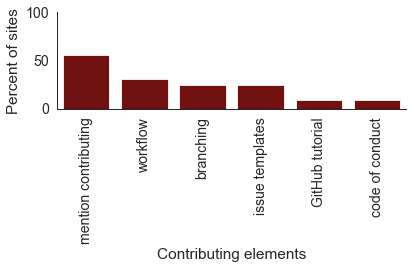

In [11]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.6)
contributing_barplot = sns.barplot(x="Contributing_elements", 
                                y = "percent", 
                                data = contributing_pages_df, 
                                color="maroon",
                               order = result['Contributing_elements'])
contributing_barplot.set(xlabel = "Contributing elements", 
                      ylabel = "Percent of sites")
contributing_barplot.set_xticklabels(contributing_barplot.get_xticklabels(), 
                                  rotation=90)
contributing_barplot.set_xticklabels(['mention contributing','workflow','branching','issue templates','GitHub tutorial','code of conduct'])
sns.despine(top=True)
plt.ylim(0,100)
plt.tight_layout(h_pad=2)
plt.savefig('figures/contributing.jpg', dpi=300)

### Analysis of repositories that ask for issues and/or PRs

Now, import issues vs. pull request data.

In [12]:
issue_and_pr = pd.read_csv('data/issues_vs_pr.csv', header=0)

Calcualte the sum of different feedback options.

In [13]:
issue_and_pr_totals = issue_and_pr.sum()
print(issue_and_pr_totals)

organization_or_project_name     Darwin CoreEMLEcological Trait Data StandardMI...
only_allows_issues                                                             9.0
both_pull_requests_and_issues                                                 13.0
unclear_how_to_contribute                                                     10.0
dtype: object


Drop the header of the data frame since we will change this before plotting the results.

In [14]:
issues_new_labels = issue_and_pr_totals.drop("organization_or_project_name")
issues_new_labels.head()

only_allows_issues                9.0
both_pull_requests_and_issues    13.0
unclear_how_to_contribute        10.0
dtype: object

Insptect the new dataframe once you have added a new header.

In [15]:
issues_df = pd.DataFrame({'ways_to_submit_issues':issues_new_labels.index, 'count':issues_new_labels.values})
issues_df

,ways_to_submit_issues,count
0,only_allows_issues,9.0
1,both_pull_requests_and_issues,13.0
2,unclear_how_to_contribute,10.0


Calculate percent of each method of providing feedback.

In [16]:
issues_df['percent'] = (issues_df['count'] / len(issue_and_pr.index)) * 100
print(issues_df)

           ways_to_submit_issues count percent
0             only_allows_issues   9.0  28.125
1  both_pull_requests_and_issues  13.0  40.625
2      unclear_how_to_contribute  10.0   31.25


Order results from high to low percentages.

In [17]:
result_issues = issues_df.sort_values('percent', ascending=False)
print(result_issues)

           ways_to_submit_issues count percent
1  both_pull_requests_and_issues  13.0  40.625
2      unclear_how_to_contribute  10.0   31.25
0             only_allows_issues   9.0  28.125
